<a href="https://colab.research.google.com/github/HasankaRajakaruna/Kaggle-Projects/blob/main/Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

###Loading the dataset

In [2]:
dataset=pd.read_csv('/content/train.csv')

###Reading the column

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##**Data Analysis**

### 01-Checking Dimension of the Datasets

In [4]:
dataset.shape

(1460, 81)

###02-Generating Basic Information of Train Data

In [5]:
dataset.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


###03-Performing Descriptive Statistical Analysis on Categorical Features

In [6]:
dataset.describe(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


###04-Performing Descriptive Statistical Analysis on Numerical Features

In [7]:
dataset.describe(include=[int,float])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


###Analyzing Temporal Variables(Eg: Datetime Variables)

In [7]:
# list of variables that contain year information
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

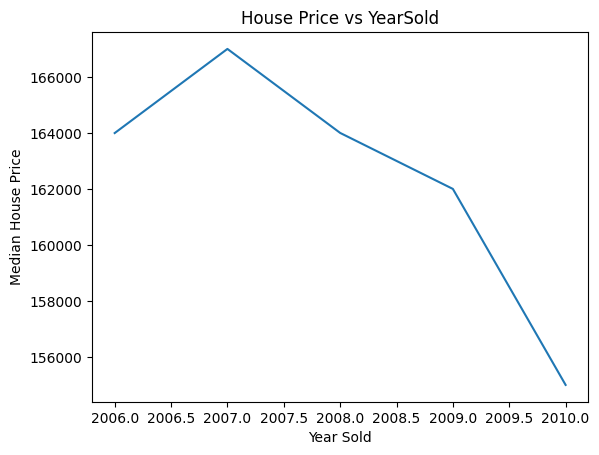

In [8]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

###Analyzing Categorical Variables

In [8]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
print("Categorical Variables Count: {}".format(len(categorical_features)))

Categorical Variables Count: 43


###Outliters in categorical variables

In [13]:
cat_cols = dataset.select_dtypes(include="object").columns.tolist()
def boxplot(col_list):
    plt.figure(figsize=(22,12))
    for index,column in enumerate(col_list):
        plt.subplot(2,4,index+1)
        sns.boxplot(x=column, y="SalePrice", data=dataset)
        plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
        plt.xticks(rotation=90)
        plt.tight_layout()

In [ ]:
boxplot(cat_cols[0:8])

###Analyzing Discreate Variables

In [9]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [ ]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

###Analyzing Continues Variables

In [10]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

###Outliters in continuous variables

In [ ]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

###Checking Duplicate Data

In [ ]:
print(f"Duplicates in Train Dataset is:{dataset.duplicated().sum()},({100*dataset.duplicated().sum()/len(dataset)})%")

###05-Computing Missing Values

In [25]:
null_data = round(dataset.isnull().sum()/len(dataset)*100,2).sort_values().to_frame().rename(columns={0:"Train % of Missing Values"})
null_data[(null_data["Train % of Missing Values"]>0)]

,Train % of Missing Values
Electrical,0.07


###06-Computing Categorical missing values

In [29]:
categorical_features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes=='O']
print(categorical_features_nan)
print('Number of Categorical missing variables: ', len(categorical_features_nan))

['Electrical']
Number of Categorical missing variables:  1


###07-Computing Numerical missing values

In [30]:
numerical_features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes!='O']
print(numerical_features_nan)
print('Number of Numerical missing variables: ', len(numerical_features_nan))

[]
Number of Numerical missing variables:  0


###Analyzing & Visualizing Target Varibele

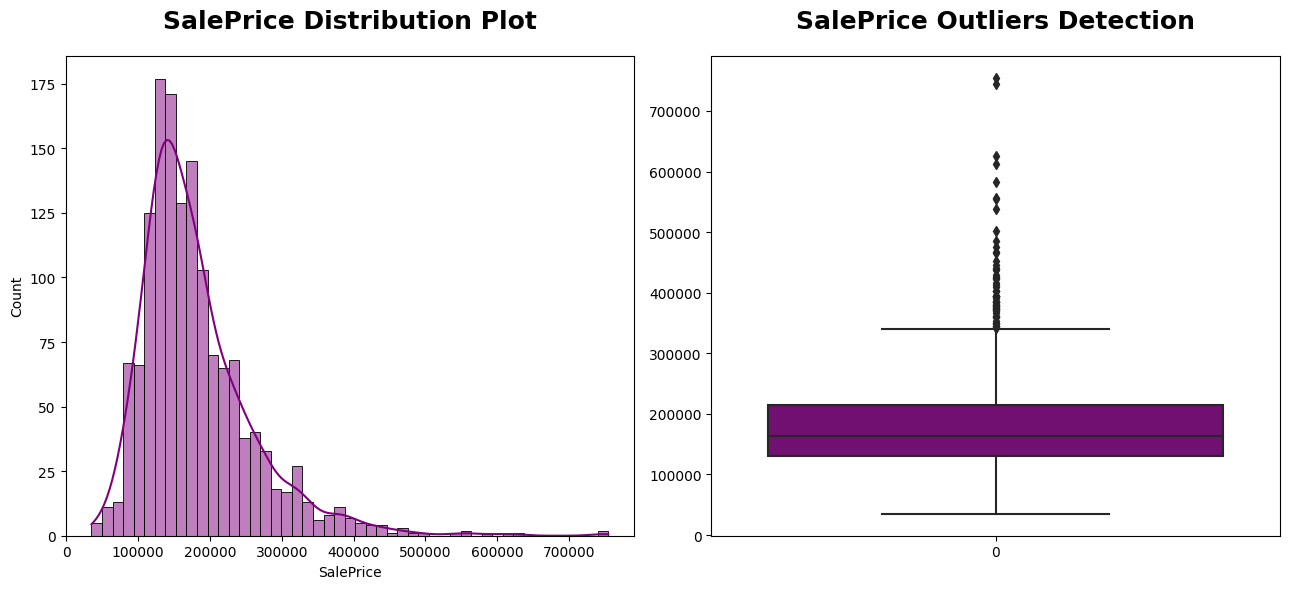

In [3]:
plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
sns.histplot(dataset["SalePrice"],color="purple",kde=True)
plt.title("SalePrice Distribution Plot",fontweight="black",pad=20,size=18)

plt.subplot(1,2,2)
sns.boxplot(dataset["SalePrice"],color="purple")
plt.title("SalePrice Outliers Detection",fontweight="black",pad=20,size=18)
plt.tight_layout()
plt.show()

###Checking suitable distribution

###**Feature Engineering**

###Dropping "Id" Feature

In [12]:
dataset.drop(columns="Id",inplace=True)

###Removing missing values

1.1 Dropping Features with more than 45% of Missing Values

In [13]:
cols = ["FireplaceQu","Fence","Alley","MiscFeature","PoolQC"]

dataset.drop(columns=cols, inplace=True)

1.2 Filling Missing Values in Numerical Columns

In [16]:
## Replacing the numerical Missing Values

for feature in numerical_features_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    dataset[feature].fillna(median_value,inplace=True)

dataset[numerical_features_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

1.3 Filling Missing Values in Categorical Columns

In [31]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,categorical_features_nan)

dataset[categorical_features_nan].isnull().sum()

Electrical    0
dtype: int64

In [32]:
print("Total Missing Values Left is:",dataset.isnull().sum().sum())

Total Missing Values Left is: 0


###Dropping Features with High Skewness Values.

In [35]:
for feature in continuous_feature:
    dataset[feature] = boxcox1p(dataset[feature], boxcox_normmax(dataset[feature] + 1))

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4461: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))


In [36]:
dataset[continuous_feature].skew().sort_values().to_frame().rename(columns={0:"Skewness"})

,Skewness
LotArea,-0.185485
1stFlrSF,-0.006606
LotFrontage,-0.001616
GrLivArea,0.005873
SalePrice,0.039639
BsmtUnfSF,0.053086
GarageArea,0.197874
BsmtFinSF1,0.382244
TotalBsmtSF,0.452751
OpenPorchSF,0.625299


In [1]:
cols_drop = ["EnclosedPorch","BsmtFinSF2","ScreenPorch	"]

dataset.drop(columns=cols_drop, inplace=True)

NameError: ignored

###Dropping Columns with High Class-Imbalance in categorical data

In [ ]:
dataset.drop(columns=["Utilities","Street","RoofMatl"],inplace=True)

###Performing Target Encoding on Categorical Features with High Cardinality

In [ ]:
cols_high_cardinality = ["Neighborhood","Exterior1st","Exterior2nd","HeatingQuality"]
for column in cols_high_cardinality:
    data = dataset.groupby(column)["SalePrice"].mean()
    for value in data.index:
        dataset[column] = dataset[column].replace({value:data[value]})

###Performing Label Encoding on Other Features

In [ ]:
col_label = ["HouseStyle","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","Electrical","KitchenQual",
        "GarageQual","GarageCond"]

encoder = LabelEncoder()

dataset[cols] = dataset[cols].apply(encoder.fit_transform)

###Performing Log Transformation on Target variable

In [33]:
z = dataset["SalePrice"]

dataset["SalePrice"] = np.log1p(dataset["SalePrice"])

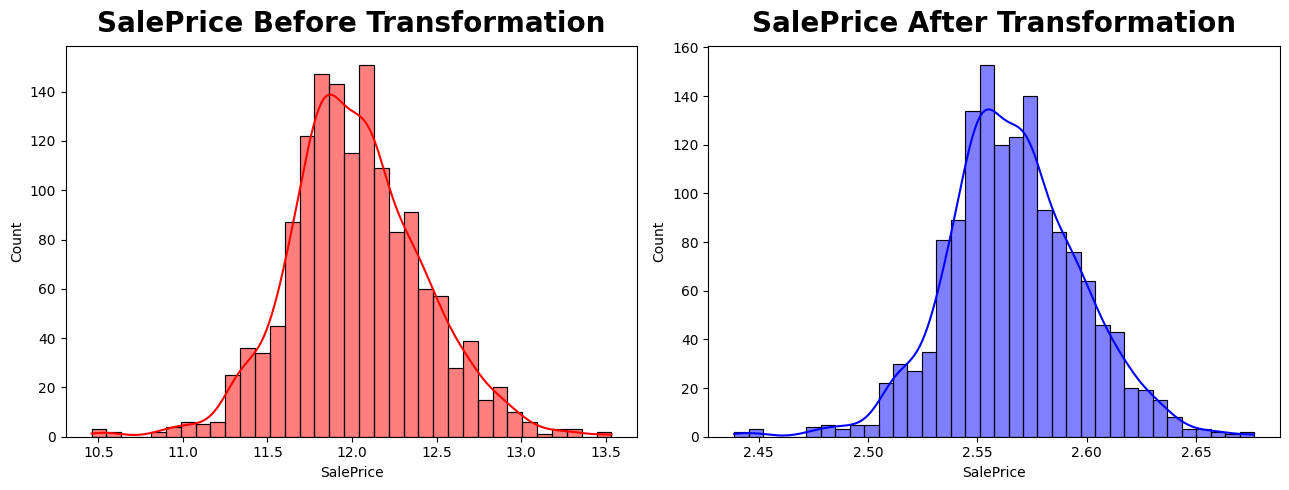

In [34]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(z,color="red",kde=True)
plt.title("SalePrice Before Transformation",size=20,pad=10,fontweight="black")

plt.subplot(1,2,2)
sns.histplot(dataset["SalePrice"],color="blue",kde=True)
plt.title("SalePrice After Transformation",size=20,pad=10,fontweight="black")
plt.tight_layout()
plt.show()

###Feature Scaling

In [ ]:
feature_scale=[feature for feature in dataset.columns if feature not in ['SalePrice']]
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])
scaler.transform(dataset[feature_scale])

###Save the model

In [ ]:
data.to_csv('X_train.csv',index=False)

##**Feature Selection**

In [ ]:
data=pd.read_csv('X_train.csv')

In [ ]:
## Capture the dependent feature
y_train=dataset[['SalePrice']]

## drop dependent feature from dataset
X_train=dataset.drop(['SalePrice'],axis=1)


In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

In [ ]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]
X_train=X_train[selected_feat]
X_train.head()